In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(context='notebook', style='darkgrid',palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [216]:
df1=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY.csv')
df2=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY2.csv')
df3=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY3.csv')
df4=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY4.csv')
df5=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY5.csv')
df6=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY6.csv')
df7=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY7.csv')
df8=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY8.csv')
df9=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY9.csv')
df10=pd.read_csv('data/T100D_SEGMENT_US_CARRIER_ONLY10.csv')

In [230]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [22]:
df.shape

(3627692, 45)

In [231]:
df.shape

(3620968, 46)

In [232]:
df.drop('Unnamed: 45', axis=1, inplace= True)

In [71]:
df.describe()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,...,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000,3627692.000
mean,23.703,24.689,737916.488,2426.412,1964.437,60994.959,2881.045,659.269,2949.477,2410.015,...,32017.396,24.137,44.966,5.274,576.073,1.208,2014.820,2.521,6.573,1.882
std,41.954,39.740,1389662.313,4883.877,4057.179,376540.650,23740.568,600.402,5223.506,4439.556,...,1485.162,17.901,30.171,1.716,178.760,0.531,2.758,1.114,3.447,1.167
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,30003.000,1.000,1.000,0.000,10.000,1.000,2010.000,1.000,1.000,1.000
25%,0.000,1.000,32580.000,48.000,8.000,0.000,0.000,205.000,143.000,115.000,...,30781.000,6.000,22.000,6.000,612.000,1.000,2012.000,2.000,4.000,1.000
50%,5.000,8.000,176904.000,348.000,240.000,0.000,0.000,503.000,818.000,646.000,...,31650.000,22.000,41.000,6.000,629.000,1.000,2015.000,3.000,7.000,2.000
75%,30.000,31.000,918880.000,2950.000,2307.000,1782.000,0.000,936.000,3838.000,3012.000,...,33158.000,39.000,74.000,6.000,675.000,1.000,2017.000,4.000,10.000,2.000
max,2361.000,1053.000,36450000.000,110336.000,95777.000,23905955.000,8163150.000,8253.000,895725.000,180007.000,...,36843.000,78.000,93.000,8.000,889.000,4.000,2019.000,4.000,12.000,17.000


In [72]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

## Exploratory Data Analysis

In [19]:
df.AIRCRAFT_TYPE.value_counts().head()
#614: Boeing 737-800
#612: Boeing 737-700/700LR/Max 7
#694: Airbus Industrie A320-100/200
#629: Canadair RJ-200ER /RJ-440
#416: Cessna 208 Caravan

614    265717
694    225579
612    214474
629    213885
416    187391
Name: AIRCRAFT_TYPE, dtype: int64

In [66]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY',
       'REGION', 'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP',
       'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'AIRCRAFT_GROUP',
       'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER', 'MONTH',
       'DISTANCE_GROUP', 'CLASS', 'Airline_Id'],
      dtype='object')

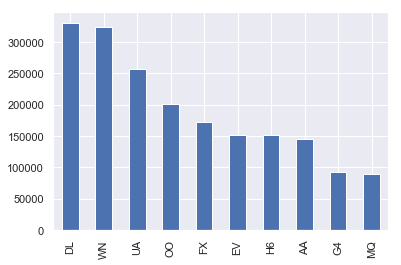

In [74]:
#Top 10 Carrier in general
df['UNIQUE_CARRIER'].value_counts().head(10).plot(kind='bar')

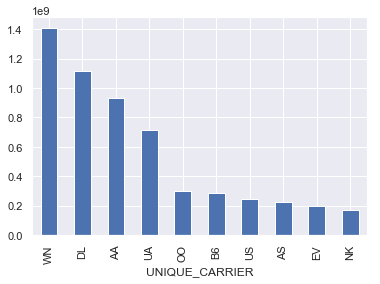

In [139]:
#Top 10 Carrier that has the most passengers
df.groupby(['UNIQUE_CARRIER']).sum()['PASSENGERS'].sort_values(ascending=False).head(10).plot(kind='bar')

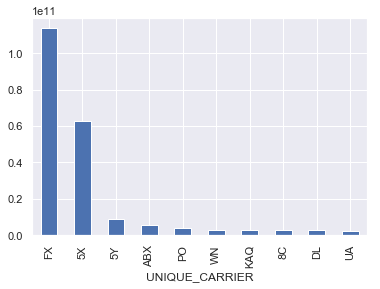

In [140]:
#Top 10 Carrier that has the most freight
df.groupby(['UNIQUE_CARRIER']).sum()['FREIGHT'].sort_values(ascending=False).head(10).plot(kind='bar')

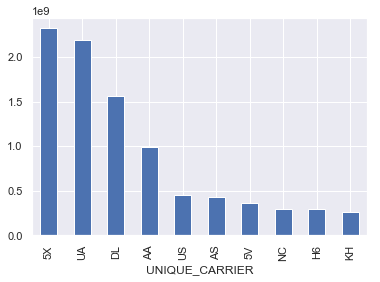

In [141]:
#Top 10 Carrier that has the most freight
df.groupby(['UNIQUE_CARRIER']).sum()['MAIL'].sort_values(ascending=False).head(10).plot(kind='bar')

In [86]:
#TOP 10 airlines that have most flights
top_10_airline=df['UNIQUE_CARRIER'].value_counts().head(10).index.tolist()

In [89]:
top_airline_df=df[df['UNIQUE_CARRIER'].isin((top_10_airline))]

In [117]:
top_airline_df.groupby(['UNIQUE_CARRIER','YEAR']).sum().head()

DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  \
UNIQUE_CARRIER YEAR                                               
AA             2010            543162.000            534179.000   
               2012           1054922.000           1035942.000   
               2013            540068.000            530412.000   
               2015           1457308.000           1436234.000   
               2016            917271.000            906890.000   

                            PAYLOAD         SEATS    PASSENGERS       FREIGHT  \
UNIQUE_CARRIER YEAR                                                             
AA             2010 22443355110.000  82012305.000  66542740.000 237078586.000   
               2012 43315251200.000 159717770.000 131388620.000 450869364.000   
               2013 22031434915.000  79268935.000  65547434.000 232549983.000   
               2015 60154370212.000 221320496.000 188172084.000 387230130.000   
               2016 38687458486.000 141738812.000 117639678.000 236921204.000   

                             MAIL     DISTANCE  RAMP_TO_RAMP      AIR_TIME  \
UNIQUE_CARRIER YEAR                                                          
AA             2010  61342651.000 10104939.000  88567868.000  75951169.000   
               2012  25361912.000 18329600.000 170998808.000 146376364.000   
               2013  14784440.000  9262178.000  87849294.000  75163393.000   
               2015 189118098.000 29290204.000 238825734.000 200516760.000   
               2016 154906051.000 19727170.000 149364406.000 124288339.000   

                     ...  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  \
UNIQUE_CARRIER YEAR  ...                                             
AA             2010  ...          11574808786            285746072   
               2012  ...          21172148616            525043450   
               2013  ...          10888157069            270365192   
               2015  ...          37045539742            920210176   
               2016  ...          25411235261            630427364   

                     DEST_STATE_FIPS  DEST_WAC  AIRCRAFT_GROUP  AIRCRAFT_TYPE  \
UNIQUE_CARRIER YEAR                                                             
AA             2010           257541    496599           54066        5708157   
               2012           479004    924816           99468       10468296   
               2013           252409    481057           51240        5390832   
               2015           847650   1545528          174068       19064126   
               2016           573061   1037838          119348       13236839   

                     AIRCRAFT_CONFIG  QUARTER   MONTH  DISTANCE_GROUP  
UNIQUE_CARRIER YEAR                                                    
AA             2010             9011    22134   57577           25075  
               2012            16578    41186  107014           45748  
               2013             8540    21491   56003           23152  
               2015            29010    83978  223368           73992  
               2016            19869    49542  128556           49930  

[5 rows x 29 columns]

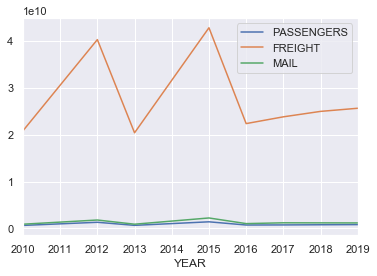

In [108]:
df.groupby('YEAR').sum()[['PASSENGERS','FREIGHT','MAIL']].plot()

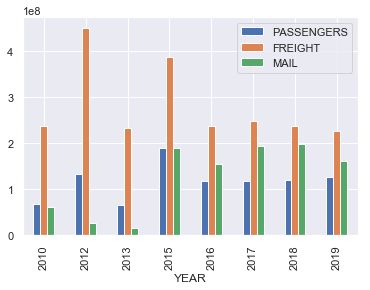

In [177]:
df[df['UNIQUE_CARRIER']=='AA'].groupby('YEAR').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

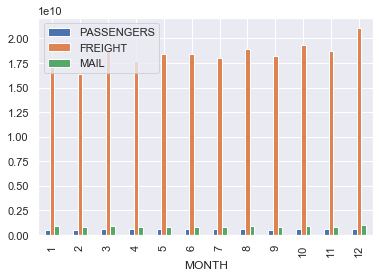

In [175]:
df.groupby('MONTH').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

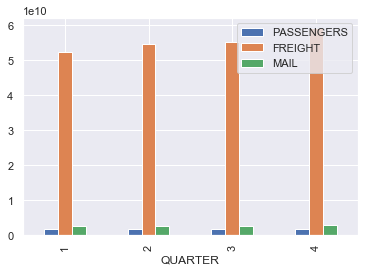

In [178]:
df.groupby('QUARTER').sum()[['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar')

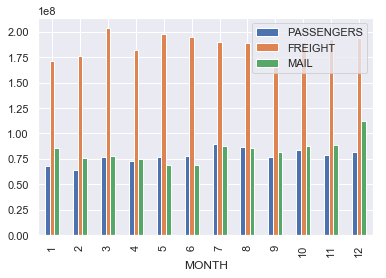

In [196]:
df[df['UNIQUE_CARRIER']=='AA'].groupby('MONTH').sum()[
    ['PASSENGERS','FREIGHT','MAIL']].plot(kind='bar') 

In [ ]:
#Let's find the most popular destination airport 

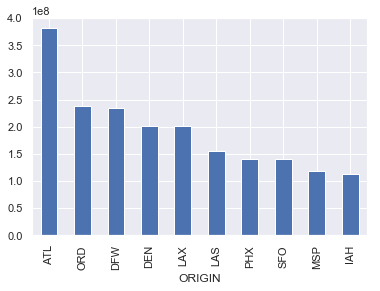

In [146]:
(top_airline_df.groupby('ORIGIN').sum()['PASSENGERS']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

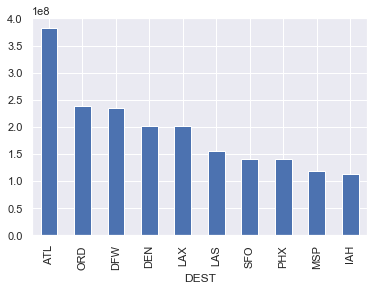

In [147]:
(top_airline_df.groupby('DEST').sum()['PASSENGERS']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

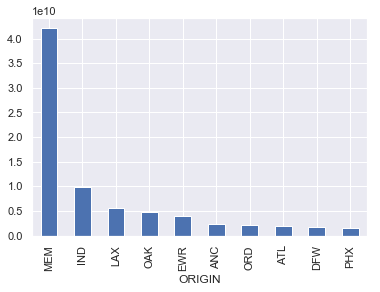

In [148]:
(top_airline_df.groupby('ORIGIN').sum()['FREIGHT']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

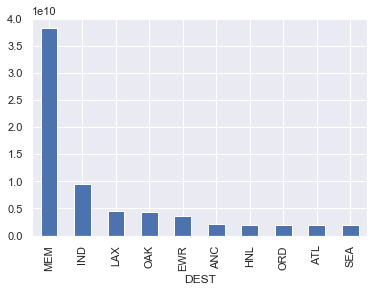

In [149]:
(top_airline_df.groupby('DEST').sum()['FREIGHT']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

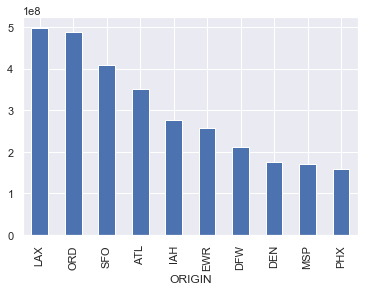

In [150]:
(top_airline_df.groupby('ORIGIN').sum()['MAIL']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

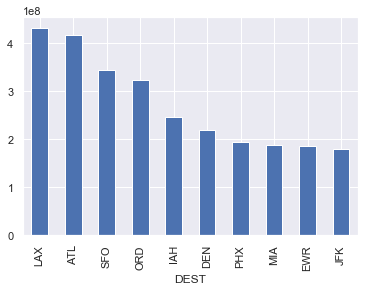

In [151]:
(top_airline_df.groupby('DEST').sum()['MAIL']
                                         .sort_values(ascending=False)).head(10).plot(kind='bar')

In [183]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS', 'EMPTY_SEATS'],
      dtype='object')

In [233]:
data = df[['PAYLOAD','PASSENGERS','SEATS','FREIGHT','MAIL','YEAR','QUARTER','MONTH']]

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620968 entries, 0 to 345003
Data columns (total 8 columns):
PAYLOAD       float64
PASSENGERS    float64
SEATS         float64
FREIGHT       float64
MAIL          float64
YEAR          int64
QUARTER       int64
MONTH         int64
dtypes: float64(5), int64(3)
memory usage: 248.6 MB


In [235]:
data['EMPTY_SEATS']=data['SEATS']-data['PASSENGERS']

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
import datetime
from datetime import date

In [236]:
data['DAY_PROXY'] = 1

data.YEAR = data.YEAR.apply(str)
data.MONTH = data.MONTH.apply(str)
data.DAY_PROXY = data.DAY_PROXY.apply(str)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627692 entries, 0 to 391008
Data columns (total 10 columns):
PAYLOAD        float64
PASSENGERS     float64
SEATS          float64
FREIGHT        float64
MAIL           float64
YEAR           object
QUARTER        int64
MONTH          object
EMPTY_SEATS    float64
DAY_PROXY      object
dtypes: float64(6), int64(1), object(3)
memory usage: 304.4+ MB


In [237]:
data['DATE'] = data.MONTH + '/' + data.DAY_PROXY + '/' + data.YEAR

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
data.head()

,PAYLOAD,PASSENGERS,SEATS,FREIGHT,MAIL,YEAR,QUARTER,MONTH,EMPTY_SEATS,DAY_PROXY,DATE
0,383600.000,0.000,0.000,33915.000,4598.000,2010,1,2,0.000,1,2/1/2010
1,12500.000,46.000,50.000,0.000,0.000,2010,1,2,4.000,1,2/1/2010
2,12500.000,46.000,50.000,0.000,0.000,2010,1,2,4.000,1,2/1/2010
3,746000.000,0.000,25.000,221471.000,0.000,2010,1,2,25.000,1,2/1/2010
4,67200.000,109.000,336.000,4.000,194.000,2010,1,3,227.000,1,3/1/2010


In [238]:
data['DATE'] = pd.to_datetime(data.DATE)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627692 entries, 0 to 391008
Data columns (total 11 columns):
PAYLOAD        float64
PASSENGERS     float64
SEATS          float64
FREIGHT        float64
MAIL           float64
YEAR           object
QUARTER        int64
MONTH          object
EMPTY_SEATS    float64
DAY_PROXY      object
DATE           datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 332.1+ MB


In [240]:
tsdf = data.groupby('DATE').sum()
tsdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2010-01-01 to 2019-12-01
Data columns (total 7 columns):
PAYLOAD        120 non-null float64
PASSENGERS     120 non-null float64
SEATS          120 non-null float64
FREIGHT        120 non-null float64
MAIL           120 non-null float64
QUARTER        120 non-null int64
EMPTY_SEATS    120 non-null float64
dtypes: float64(6), int64(1)
memory usage: 7.5 KB


In [241]:
tsdf.drop('QUARTER',axis=1,inplace=True)

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(tsdf)

                   PAYLOAD   PASSENGERS        SEATS        FREIGHT  \
DATE                                                                  
2010-01-01 20221230202.000 46717947.000 66617337.000 1582087091.000   
2010-02-01 18231528323.000 43498396.000 59442504.000 1529047157.000   
2010-03-01 21467739489.000 55804909.000 70673162.000 1764835211.000   
2010-04-01 21025378093.000 53768509.000 68726880.000 1746444288.000   
2010-05-01 21345539285.000 55184999.000 70321656.000 1714054671.000   
2010-06-01 21594530054.000 58224298.000 71068668.000 1763624364.000   
2010-07-01 22263158310.000 60780260.000 73719985.000 1758527183.000   
2010-08-01 22199949061.000 58940421.000 73555947.000 1735955564.000   
2010-09-01 20773704491.000 51621759.000 68116903.000 1766659172.000   
2010-10-01 21553741439.000 56205888.000 70617110.000 1810424478.000   
2010-11-01 20770366392.000 52712642.000 68019087.000 1693043200.000   
2010-12-01 21643663670.000 52486676.000 68289115.000 1980105814.000   
2011-0

In [242]:
tsdf.to_pickle("./tsdata.pkl")

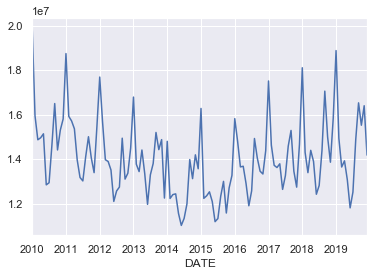

In [243]:
tsdf.groupby('DATE').sum()['EMPTY_SEATS'].plot();